In [69]:
from nltk.corpus import wordnet as wn
from collections import Counter, OrderedDict

In [1]:
import os, random, shutil
from tqdm.notebook import tqdm

In [25]:
def rename_folders(path, f):
    for folder in os.listdir(path):
        if os.path.isdir(os.path.join(path, folder)):
            worked, new_name = f(folder)
            if not worked:
                continue
            os.rename(os.path.join(path, folder), os.path.join(path, new_name))

In [24]:
def folder_rename(fname):
    pos, offset_str = fname[0], fname[1:]
    if offset_str.isnumeric():
        offset = int(offset_str)
    else:
        return False, None
    return True, wn.synset_from_pos_and_offset(pos, offset).name().replace('.', '-').replace('/', '_')

In [14]:
folder_rename('n00004475')

'organism-n-01'

In [32]:
rename_folders("/Volumes/Infinite Eye/imagenet", folder_rename)

In [31]:
len(os.listdir("/Volumes/Infinite Eye/imagenet"))

7736

In [35]:
def count_imagenet(dirs):
    ims = []
    for imdir in dirs:
        for folder in os.listdir(os.path.join(imdir, "imagenet")):
            fulldir = os.path.join(imdir, "imagenet", folder)
            if os.path.isdir(fulldir):
                ims.append(len(os.listdir(fulldir)))
    return ims

In [36]:
imcounts = count_imagenet(["/Volumes/Seer/Datasets"])
sum(imcounts)

14198356

In [42]:
a = [2]
a += [1]
a

[2, 1]

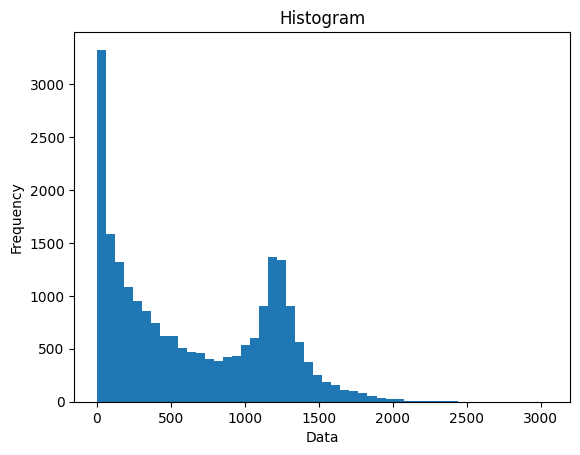

In [75]:
import matplotlib.pyplot as plt

plt.hist(imcounts, bins=50)
plt.title('Histogram')
plt.xlabel('Data')
plt.ylabel('Frequency')

plt.show()

In [127]:
def move_sample(src_dirs, dst_dir, n_per):
    for imdir in src_dirs:
        for folder in tqdm(os.listdir(os.path.join(imdir, "imagenet"))):
            fulldir = os.path.join(imdir, "imagenet", folder)
            if os.path.isdir(fulldir):
                ims = os.listdir(fulldir)
                n_ims = len(ims)
                if n_ims == 0:
                    continue
                samples = random.sample(ims, min(n_ims, n_per))
                os.mkdir(os.path.join(dst_dir, "imagenet_sample", folder))
                for sample in samples:
                    shutil.copy(os.path.join(fulldir, sample), os.path.join(dst_dir, "imagenet_sample", folder, sample))
                    

In [128]:
move_sample(["/Volumes/Rome", "/Volumes/Infinite Eye"], "/Volumes/Samsung_T3", 5)

  0%|          | 0/14106 [00:00<?, ?it/s]

  0%|          | 0/7736 [00:00<?, ?it/s]

In [30]:
def transfer_imagenet(src, dst):
    for folder in tqdm(os.listdir(os.path.join(src, "imagenet"))):
        if not os.path.isdir(os.path.join(src, "imagenet", folder)):
            print(f"skipped {folder}, not a directory")
            continue
        try:
            shutil.move(os.path.join(src, "imagenet", folder), os.path.join(dst, "imagenet"))
        except Exception as e:
            print(f"{folder} had an issue: {e}")

In [31]:
transfer_imagenet("/Volumes/Rome", "/Volumes/Seer/Datasets")

  0%|          | 0/4 [00:00<?, ?it/s]

skipped .DS_Store, not a directory


In [32]:
len(os.listdir("/Volumes/Rome/imagenet"))

1

In [33]:
[
    (
        f,
        len(
            set(os.listdir(os.path.join("/Volumes/Rome/imagenet", f)))
            .intersection(os.listdir(os.path.join("/Volumes/Seer/Datasets/imagenet", f)))
        ), 
        len(os.listdir(os.path.join("/Volumes/Rome/imagenet", f))),
        len(os.listdir(os.path.join("/Volumes/Seer/Datasets/imagenet", f)))
    )
    for f in os.listdir(("/Volumes/Rome/imagenet"))
    if os.path.isdir(os.path.join("/Volumes/Rome/imagenet", f))
]

[]

In [34]:
len(os.listdir("/Volumes/Seer/Datasets/imagenet"))

21842